In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from numba import njit

In [2]:
df = pd.read_csv("coordinates.csv")

In [3]:
frame1 = df[df['frame']==1]
frame1x = np.array(frame1['x'])
frame1y = np.array(frame1['y'])

In [4]:
frame1x

array([  20.569,   19.809,   20.428, ..., 1259.6  , 1259.7  , 1259.8  ])

In [5]:
num_particles = len(frame1x)

In [7]:
num_particles

4087

In [100]:
config = np.array(list(zip(frame1x, frame1y)))
box_size = 900

In [99]:
def boxup(conf):
    box_conf = []
    for i in conf:
        if 100<i[0]<1000 and 100<i[1]<1000:
            box_conf.append(i)
    return np.asarray(box_conf)

In [49]:
@njit
def comp_dist(conf, num, box_size):
    dist = np.zeros(int(num*(num-1)/2))
    count = 0
    for i in range(num):
        for j in range(i):
            dr = conf[i] - conf[j]
            dr = dr - box_size*np.floor(dr/box_size+0.5)
            dist[count] = np.sqrt(sum(dr**2))
            count +=1
    return dist

(array([ 64376., 178670., 292395., 406628., 519998., 633644., 748033.,
        509039., 245016.,  75606.]),
 array([  4.55141736,  67.72669386, 130.90197036, 194.07724686,
        257.25252336, 320.42779987, 383.60307637, 446.77835287,
        509.95362937, 573.12890587, 636.30418237]),
 <BarContainer object of 10 artists>)

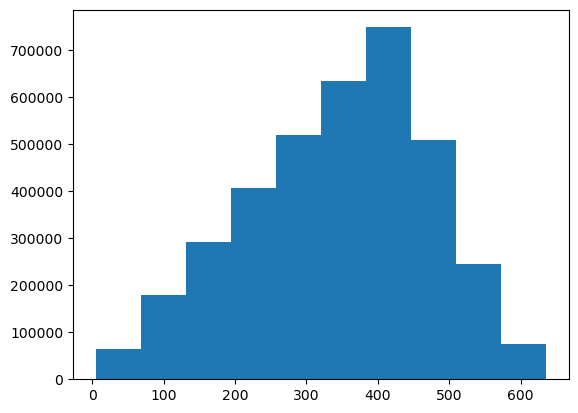

In [118]:
num_particles1 = bc.shape[0]
d = comp_dist(bc,num_particles1,box_size)
plt.hist(d)

In [119]:
def histogram_distances(distance_list, max_dist, bin_size):
    # this is the list of bins in which to calculate
    bins = np.arange(0, max_dist+bin_size, bin_size)
    hist, bin_edges = np.histogram( distance_list, bins=bins )
    return hist, bin_edges
def plot_histogram(hist,bin_edges, box_size):
    #for N bins, there are N+1 bin edges. The centers can be found by averaging the positions of 
    # bin edge0 and 1, 1 and 2, ..., N-1 and N
    bin_centers = (bin_edges[:-1]+bin_edges[1:])/2.0
    plt.scatter(bin_centers,hist,marker='o', s=1)
    plt.plot(bin_centers,hist)
    plt.xlim(right = box_size/2)
    plt.ylabel("N(r)")
    plt.xlabel("$r$")




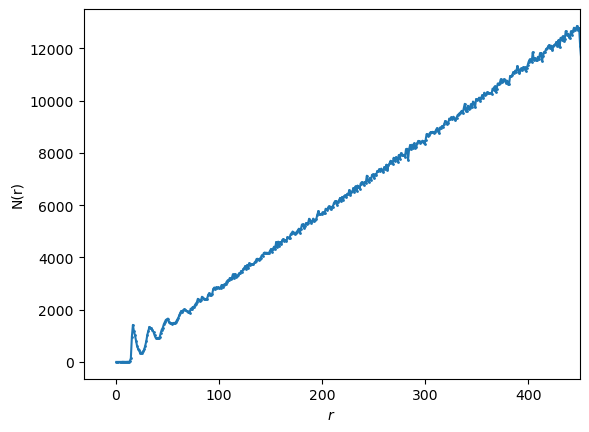

In [120]:
bins = 4
hist, bined = histogram_distances(d,box_size/2.0*np.sqrt(2), 1)
plot_histogram(hist,bined,box_size)

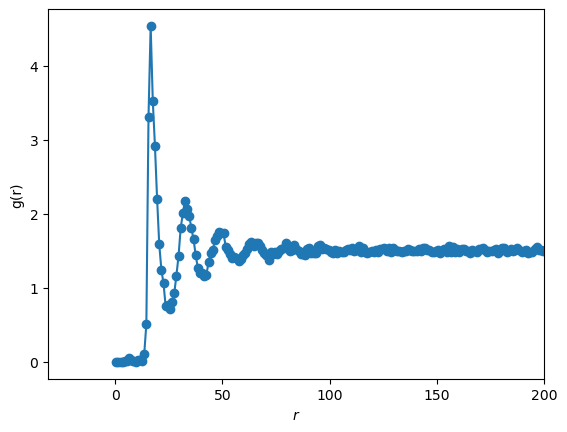

In [123]:
def plot_rdf(gofr,bin_centers):
    plt.plot(bin_centers,gofr,marker='o')
    plt.xlim(right=200)
    plt.ylabel("g(r)")
    plt.xlabel("$r$")
    
def get_gofr(hist,bin_edges,num_particles, box_size):
    rho = num_particles/box_size
    bin_centers = (bin_edges[1:]+bin_edges[:-1])/2.0
    dr = bin_edges[1]-bin_edges[0]
    denominator = 2.*np.pi*bin_centers*dr*rho
    gofr = hist/denominator
    
    return gofr, bin_centers

gofr, bin_centers = get_gofr(hist, bined, num_particles1, box_size )
    
plot_rdf(gofr, bin_centers)

In [124]:
bc = boxup(config)
bc

array([[101.01, 238.25],
       [100.28, 952.47],
       [101.2 , 367.12],
       ...,
       [996.7 , 695.91],
       [998.46, 400.34],
       [998.66, 634.07]])

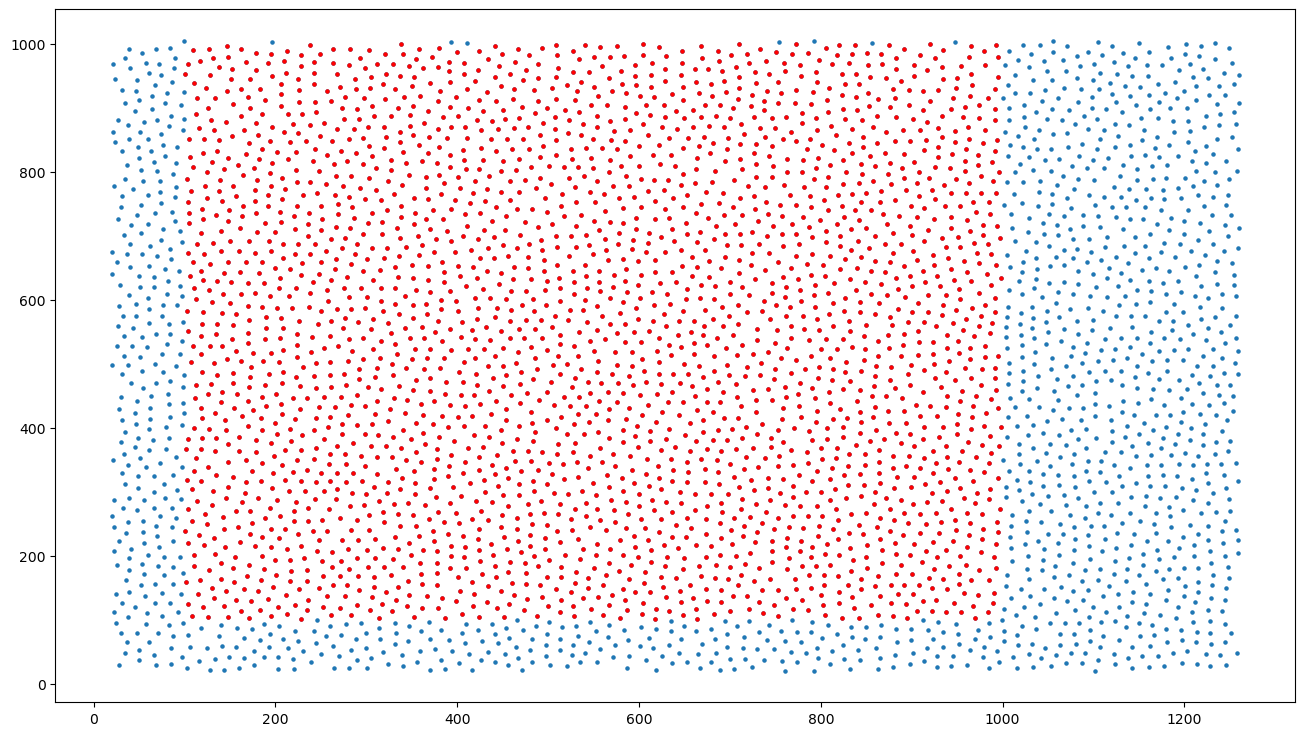

In [102]:
fig, axes= plt.subplots(1,1,figsize=(16,9))
# axes.scatter(s1x,s1y,s=5)
# axes.scatter(frame1x,frame1y,s=5)
axes.scatter(config[:,0],config[:,1],s=5)
axes.scatter(bc[:,0],bc[:,1],s=5, c='r')


In [108]:
bc.shape[0]

2711